# Problem 2 of 2 Final Programming Part 
## Comparing clustering to true labels

In this problem you are going to apply the k-means clustering algorithm to data from cars from model years 1970-1982 inclusive. Cars in this data set are from US, Europe, and Japan, which is represented by the variable `origin`. Your task is to cluster the cars into three clusters, and then compare the clusters to the true labels to see how well the clustering algorithm did. Keep in mind that as I mentioned in class, correct clustering is a challenge.

### Part 0: Data Imports

In [1]:
# prompt: Data of cars from the 1980s build an example using a neural net with 3 layers to determine if the car is from Europe, America or Japan

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

score = {0:0}

### Part 1: Load and Inspect the Data

Load the data from the URL https://bit.ly/data4mpg and perform inspection tasks.

#### 1.1 Load csv file from the URL https://bit.ly/data4mpg

Load a csv from the URL https://bit.ly/data4mpg and store it as a pandas DataFrame in the variable `cars_df`.


In [4]:
# 1.1 Load data code here
url = 'https://bit.ly/data4mpg'
cars_df = pd.read_csv(url)
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.1'] = 5

#### 1.2 Inspect the data

1. Print out the first 5 rows of the data
1. Print the columns of the data, and their data types, and the non-null counts
1. Print the summary statistics of the data
2. Use seaborn to create a pairplot of the data, with the hue being the `origin` column

In [5]:
#### 1.2.1
print(cars_df.head())

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.1'] = 5

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [6]:
#### 1.2.2
print(cars_df.dtypes)

print(cars_df.info())

# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.2'] = 5

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [7]:
#### 1.2.3
print(cars_df.describe())
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.3'] = 5

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


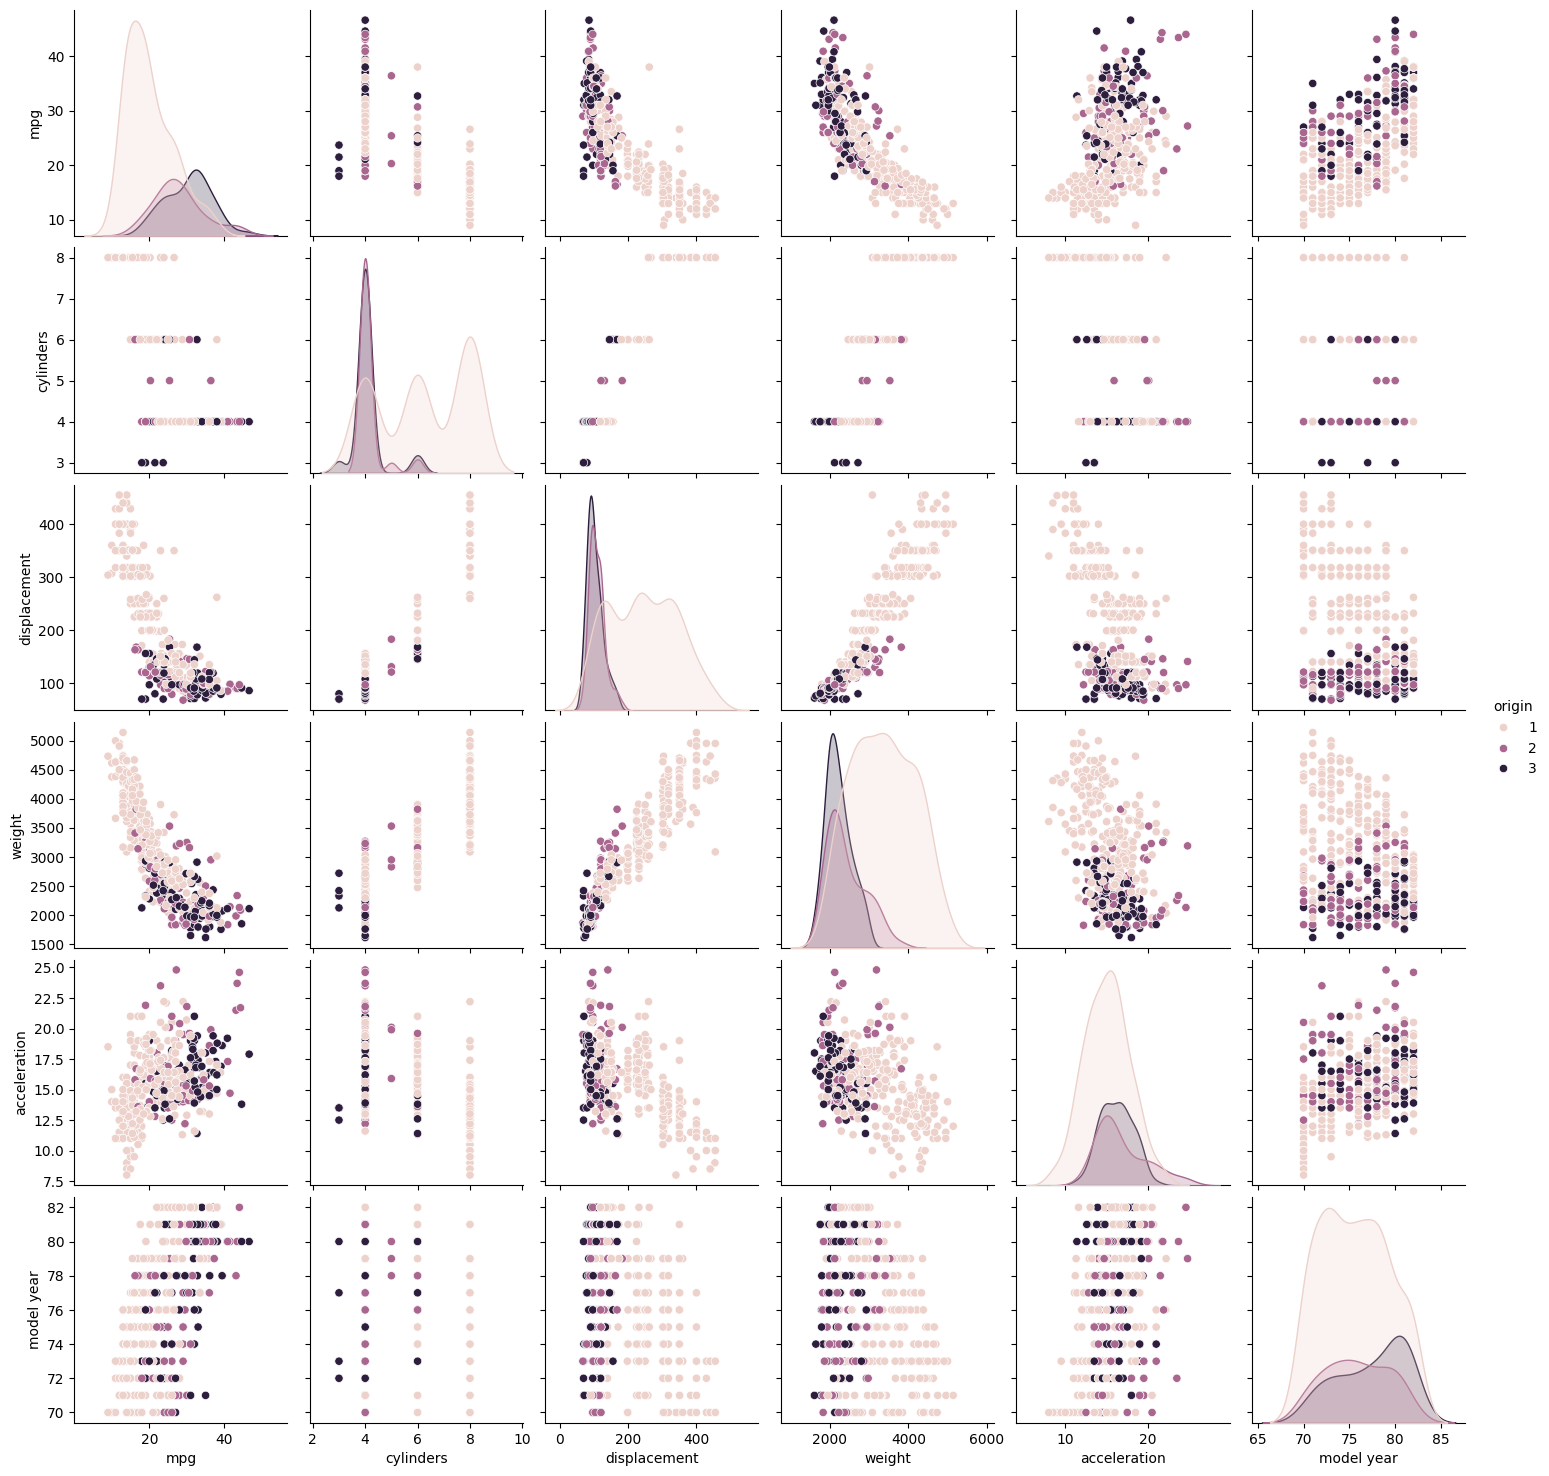

In [8]:
#### 1.2.4
sns.pairplot(cars_df, hue='origin')
plt.show()
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.2.4'] = 5

### 1.3 Set up the data for regression

1. Select the columns `mpg`, `cylinders`, `displacement`, `weight`, `acceleration` (inputs) to create a **numpy array** `X` of the inputs. Select the column `origin` (output) to create a **numpy array** `y` of the output. Keep in mind we are **not** doing classifification so we will **not** be training on `y`.
2. Create a `Kmeans` model that will cluster the data into 3 clusters. Set the `random_state` to 42. Fit the model to the data `X`. Extract the labels from the model and store them in the variable `labels`.
3. For convenience create a DataFrame `cluster_df` that has the columns 'weight': `displacement`, `origin`, from the original DataFrame `cars_df` and the `labels` from the model. Print the first 5 rows of `cluster_df` to verify it looks correct.
4. Use matplotlib, subplots to create a figure with 1 nrows and 2 ncols (2 plots side by side). In the left plot, create a seaborn scatter plot of `weight` vs `displacement` with the hue being the `origin` column. In the right plot, create a scatter plot of `weight` vs `displacement` with the hue being the `labels` column. Add a title to each plot. Remember you will be passing the axes to the plotting function and indexing them as `ax[0]` and `ax[1]`.
                       

In [9]:
#### 1.3.1
input_columns = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']
output_column = ['origin']
X = cars_df[input_columns].values
y = cars_df[output_column].values
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.1'] = 5

In [10]:
#### 1.3.2
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.2'] = 5

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
#### 1.3.3
selected_columns = ['displacement', 'weight', 'origin']
cluster_df = cars_df[selected_columns].copy()
cluster_df['labels'] = labels
print(cluster_df.head())
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.3'] = 5

   displacement  weight  origin  labels
0         307.0    3504       1       1
1         350.0    3693       1       1
2         318.0    3436       1       1
3         304.0    3433       1       1
4         302.0    3449       1       1


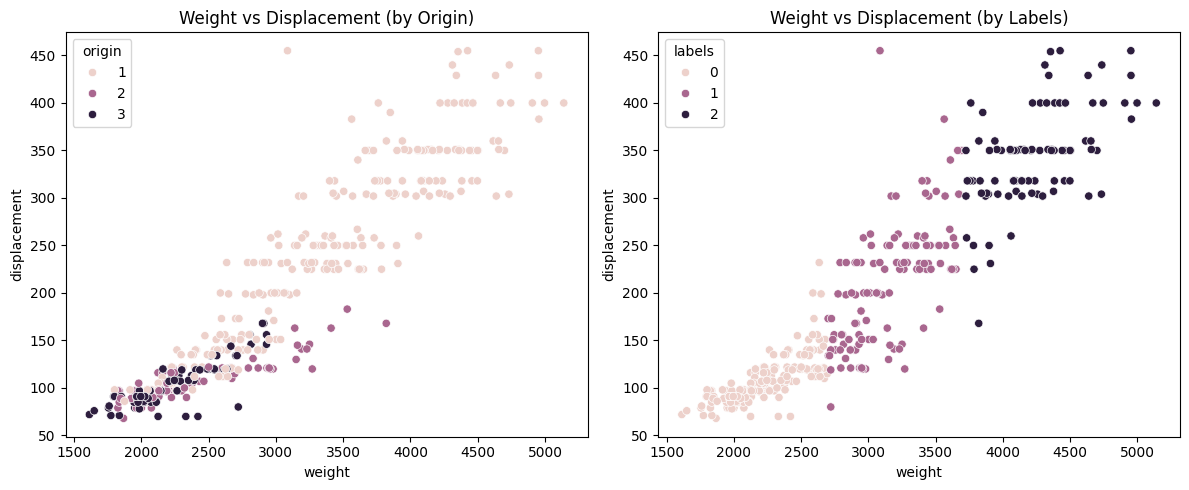

In [12]:
#### 1.3.4
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(x='weight', y='displacement', hue='origin', data=cluster_df, ax=ax[0])
ax[0].set_title('Weight vs Displacement (by Origin)')
sns.scatterplot(x='weight', y='displacement', hue='labels', data=cluster_df, ax=ax[1])
ax[1].set_title('Weight vs Displacement (by Labels)')
plt.tight_layout()
plt.show()
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.4'] = 5

### 1.3.5 Explain the results. How well does the clustering match up to the actual labels?
The clustering partially matches the actual labels but doesn't perfectly align. Some clusters in the clustering model might overlap with multiple categories from the origin column, indicating similarity in certain attributes, but not a direct match to the original categories.

In [13]:
# Leave the code in this cell below unchanged. Use print if output is desired
score['1.3.5'] = 5
sum(score.values())*45/50

45.0